<a href="https://colab.research.google.com/github/AbeerWafa-21/AbeerWafa-21-Multiclassification-Alzheimer-Disease/blob/main/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
# Load The data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Alzheimer.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (46).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (47).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (48).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (49).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (5).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (50).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (51).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (52).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (53).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (54).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (55).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (56).jpg  
  inflating: Alzheimer_MRI_4_classes_dataset/NonDemented/13 (57).jpg  
  inflating: Alzheimer_MRI_

In [ ]:
Class_1_img = '/content/Alzheimer_MRI_4_classes_dataset/MildDemented'
Class_2_img = '/content/Alzheimer_MRI_4_classes_dataset/ModerateDemented'
Class_3_img ='/content/Alzheimer_MRI_4_classes_dataset/NonDemented'
Class_4_img = '/content/Alzheimer_MRI_4_classes_dataset/VeryMildDemented'

In [ ]:
data = pd.DataFrame(columns = ['Path','Label'])
for folder in [Class_1_img,Class_2_img,Class_3_img,Class_4_img]:
    for i in os.listdir(folder):
        img = os.path.join(folder,i)
        if('MildDemented' in folder):
            label = 'MildDemented'
        if('ModerateDemented' in folder):
            label = 'ModerateDemented'
        if('NonDemented' in folder):
            label = 'NonDemented'
        if('VeryMildDemented' in folder):
            label = 'VeryMildDemented'
        data = data.append({'Path':img,'Label':label},ignore_index=True)

print(len(data))

Streaming output truncated to the last 5000 lines.
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-

6400


<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Path':img,'Label':label},ignore_index=True)
<ipython-input-5-9ccbab9336bf>:13: FutureWarning: The frame.

In [ ]:
data.head()

,Path,Label
0,/content/Alzheimer_MRI_4_classes_dataset/MildD...,MildDemented
1,/content/Alzheimer_MRI_4_classes_dataset/MildD...,MildDemented
2,/content/Alzheimer_MRI_4_classes_dataset/MildD...,MildDemented
3,/content/Alzheimer_MRI_4_classes_dataset/MildD...,MildDemented
4,/content/Alzheimer_MRI_4_classes_dataset/MildD...,MildDemented


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    6400 non-null   object
 1   Label   6400 non-null   object
dtypes: object(2)
memory usage: 100.1+ KB


In [ ]:
class_1_img =data.Path[data.Label == 'MildDemented']
class_2_img =data.Path[data.Label == 'ModerateDemented']
class_3_img =data.Path[data.Label == 'NonDemented']
class_4_img =data.Path[data.Label == 'VeryMildDemented']

In [ ]:
# visualize the data
Class_1_num = len(class_1_img)
Class_2_num = len(class_2_img)
Class_3_num = len(class_3_img)
Class_4_num = len(class_4_img)

total_img_num = Class_1_num + Class_2_num + Class_3_num + Class_4_num

print('Number of  Images of Class_1: {}' .format(Class_1_num))
print('Number of Images of Class_2 : {}' .format(Class_2_num))
print('Number of Images of Class_3 : {}' .format(Class_3_num))
print('Number of Images of Class_4 : {}' .format(Class_4_num))
print('Total Number of  Images : {}' .format(total_img_num))


Number of  Images of Class_1: 896
Number of Images of Class_2 : 64
Number of Images of Class_3 : 3200
Number of Images of Class_4 : 2240
Total Number of  Images : 6400


In [ ]:
px.histogram(data,x='Label',color='Label',color_discrete_map={'MildDemented':'green','ModerateDemented':'blue','NonDemented':'yellow','VeryMildDemented':'red'})

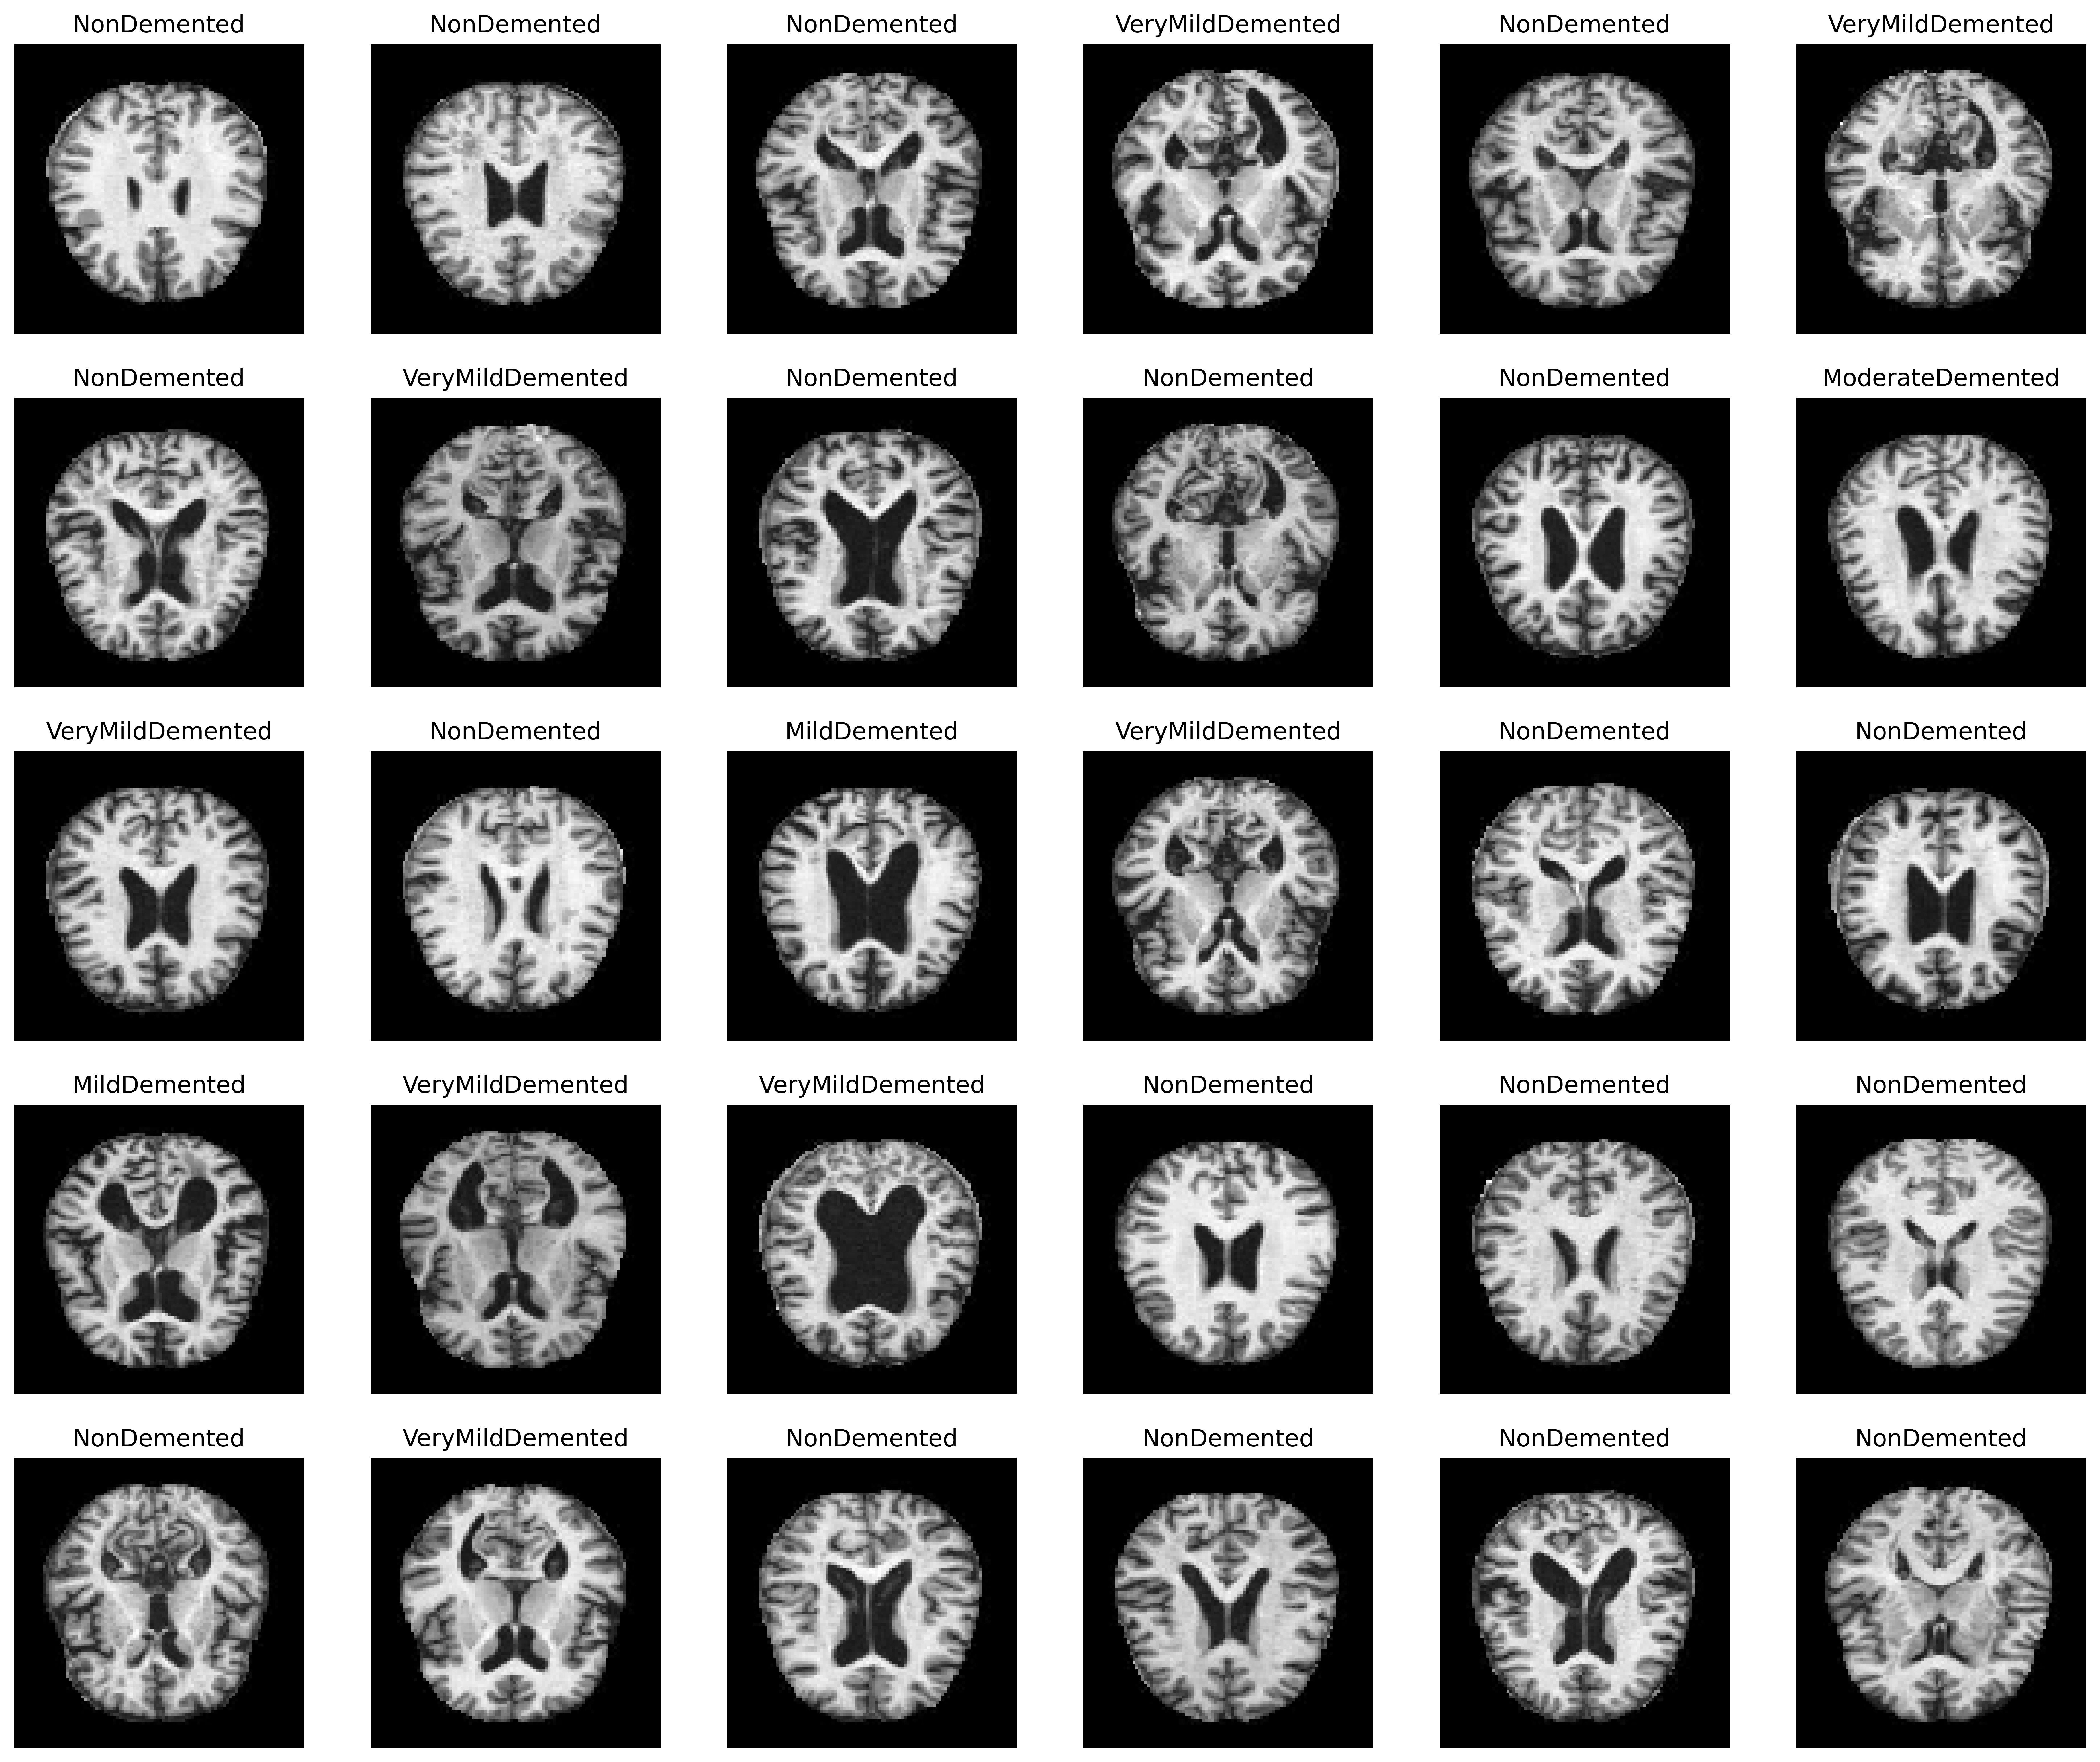

In [ ]:
# view image random images
from tensorflow.keras.preprocessing import image
def view_30_random_image():
    fig = plt.figure(figsize = (15, 15),dpi=500)
    for i in range(30):
        rand = random.randint(0,len(data.Label))
        ax = plt.subplot(6, 6, i+1)

        img = image.load_img(data.Path[rand],target_size=(100, 100))
        img = image.img_to_array(img)
        if data.Label[rand] == 'MildDemented':
            plt.title('MildDemented')
        if data.Label[rand] == 'ModerateDemented':
            plt.title('ModerateDemented')
        if data.Label[rand] == 'NonDemented':
            plt.title('NonDemented')
        if data.Label[rand] == 'VeryMildDemented':
            plt.title('VeryMildDemented')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img.astype('uint8'))

view_30_random_image()

In [ ]:
# images Preprocessing
from matplotlib.image import imread
import cv2

some_Class_1_img = random.sample(list(class_1_img ),len(class_1_img))
some_Class_2_img= random.sample(list(class_2_img), len(class_2_img))
some_Class_3_img= random.sample(list(class_3_img), len(class_3_img))
some_Class_4_img= random.sample(list(class_4_img), len(class_4_img))

Class_1_img_arr = []
Class_2_img_arr = []
Class_3_img_arr = []
Class_4_img_arr = []

for img in some_Class_1_img:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (128,128), interpolation = cv2.INTER_LINEAR)
    Class_1_img_arr.append([n_img_size, 0])

for img in some_Class_2_img:

    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (128, 128), interpolation = cv2.INTER_LINEAR)
    Class_2_img_arr.append([c_img_size, 1])

for img in some_Class_3_img:

    h_img = cv2.imread(img, cv2.IMREAD_COLOR)
    h_img_size = cv2.resize(h_img, (128,128), interpolation = cv2.INTER_LINEAR)
    Class_3_img_arr.append([h_img_size, 2])

for img in some_Class_4_img:

    y_img = cv2.imread(img, cv2.IMREAD_COLOR)
    y_img_size = cv2.resize(y_img, (128, 128), interpolation = cv2.INTER_LINEAR)
    Class_4_img_arr.append([y_img_size, 3])

In [ ]:
X = []
y = []

Data_img_arr = np.concatenate((Class_1_img_arr,Class_2_img_arr,Class_3_img_arr,Class_4_img_arr))
random.shuffle(Data_img_arr)

for feature, label in Data_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

X shape : (6400, 128, 128, 3)


<__array_function__ internals>:180: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# Splitting the data to training and testing
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.20, random_state = 42)
X_train=X[:6330]
y_train=y[:6330]
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
X_train.reshape(-1, 128,128, 1)
X_test.reshape(-1, 128,128, 1)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (6330, 128, 128, 3)
X_test shape : (1280, 128, 128, 3)
y_train shape : (6330, 4)
y_test shape : (1280, 4)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator(
       featurewise_center=False,
      samplewise_center=False,
       featurewise_std_normalization=False,
       samplewise_std_normalization=False,
       zca_whitening=False,
       rotation_range = 90,
       zoom_range = 0.5,
      width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip = True,

)


datagenerator.fit(X_train)
datagenerator.fit(X_test)

In [ ]:
import tensorflow as tf
X_train = np.array(X_train).reshape(6330,1,128,128, 3)
X_test = np.array(X_test).reshape(1280,1,128,128, 3)
print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))

X_train shape : (6330, 1, 128, 128, 3)
X_test shape : (1280, 1, 128, 128, 3)


In [ ]:
model =tf.keras.Sequential([
tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64,(3,3),activation='relu'),input_shape=(1,128,128,3)),
tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),
tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32,(3,3),activation='relu')),
tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),
tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
#RNN
tf.keras.layers.LSTM(100,return_sequences=False),
tf.keras.layers.Dense(4,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 126, 126, 64)   1792      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 63, 63, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 61, 61, 32)     18464     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 30, 30, 32)     0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 28800)          0

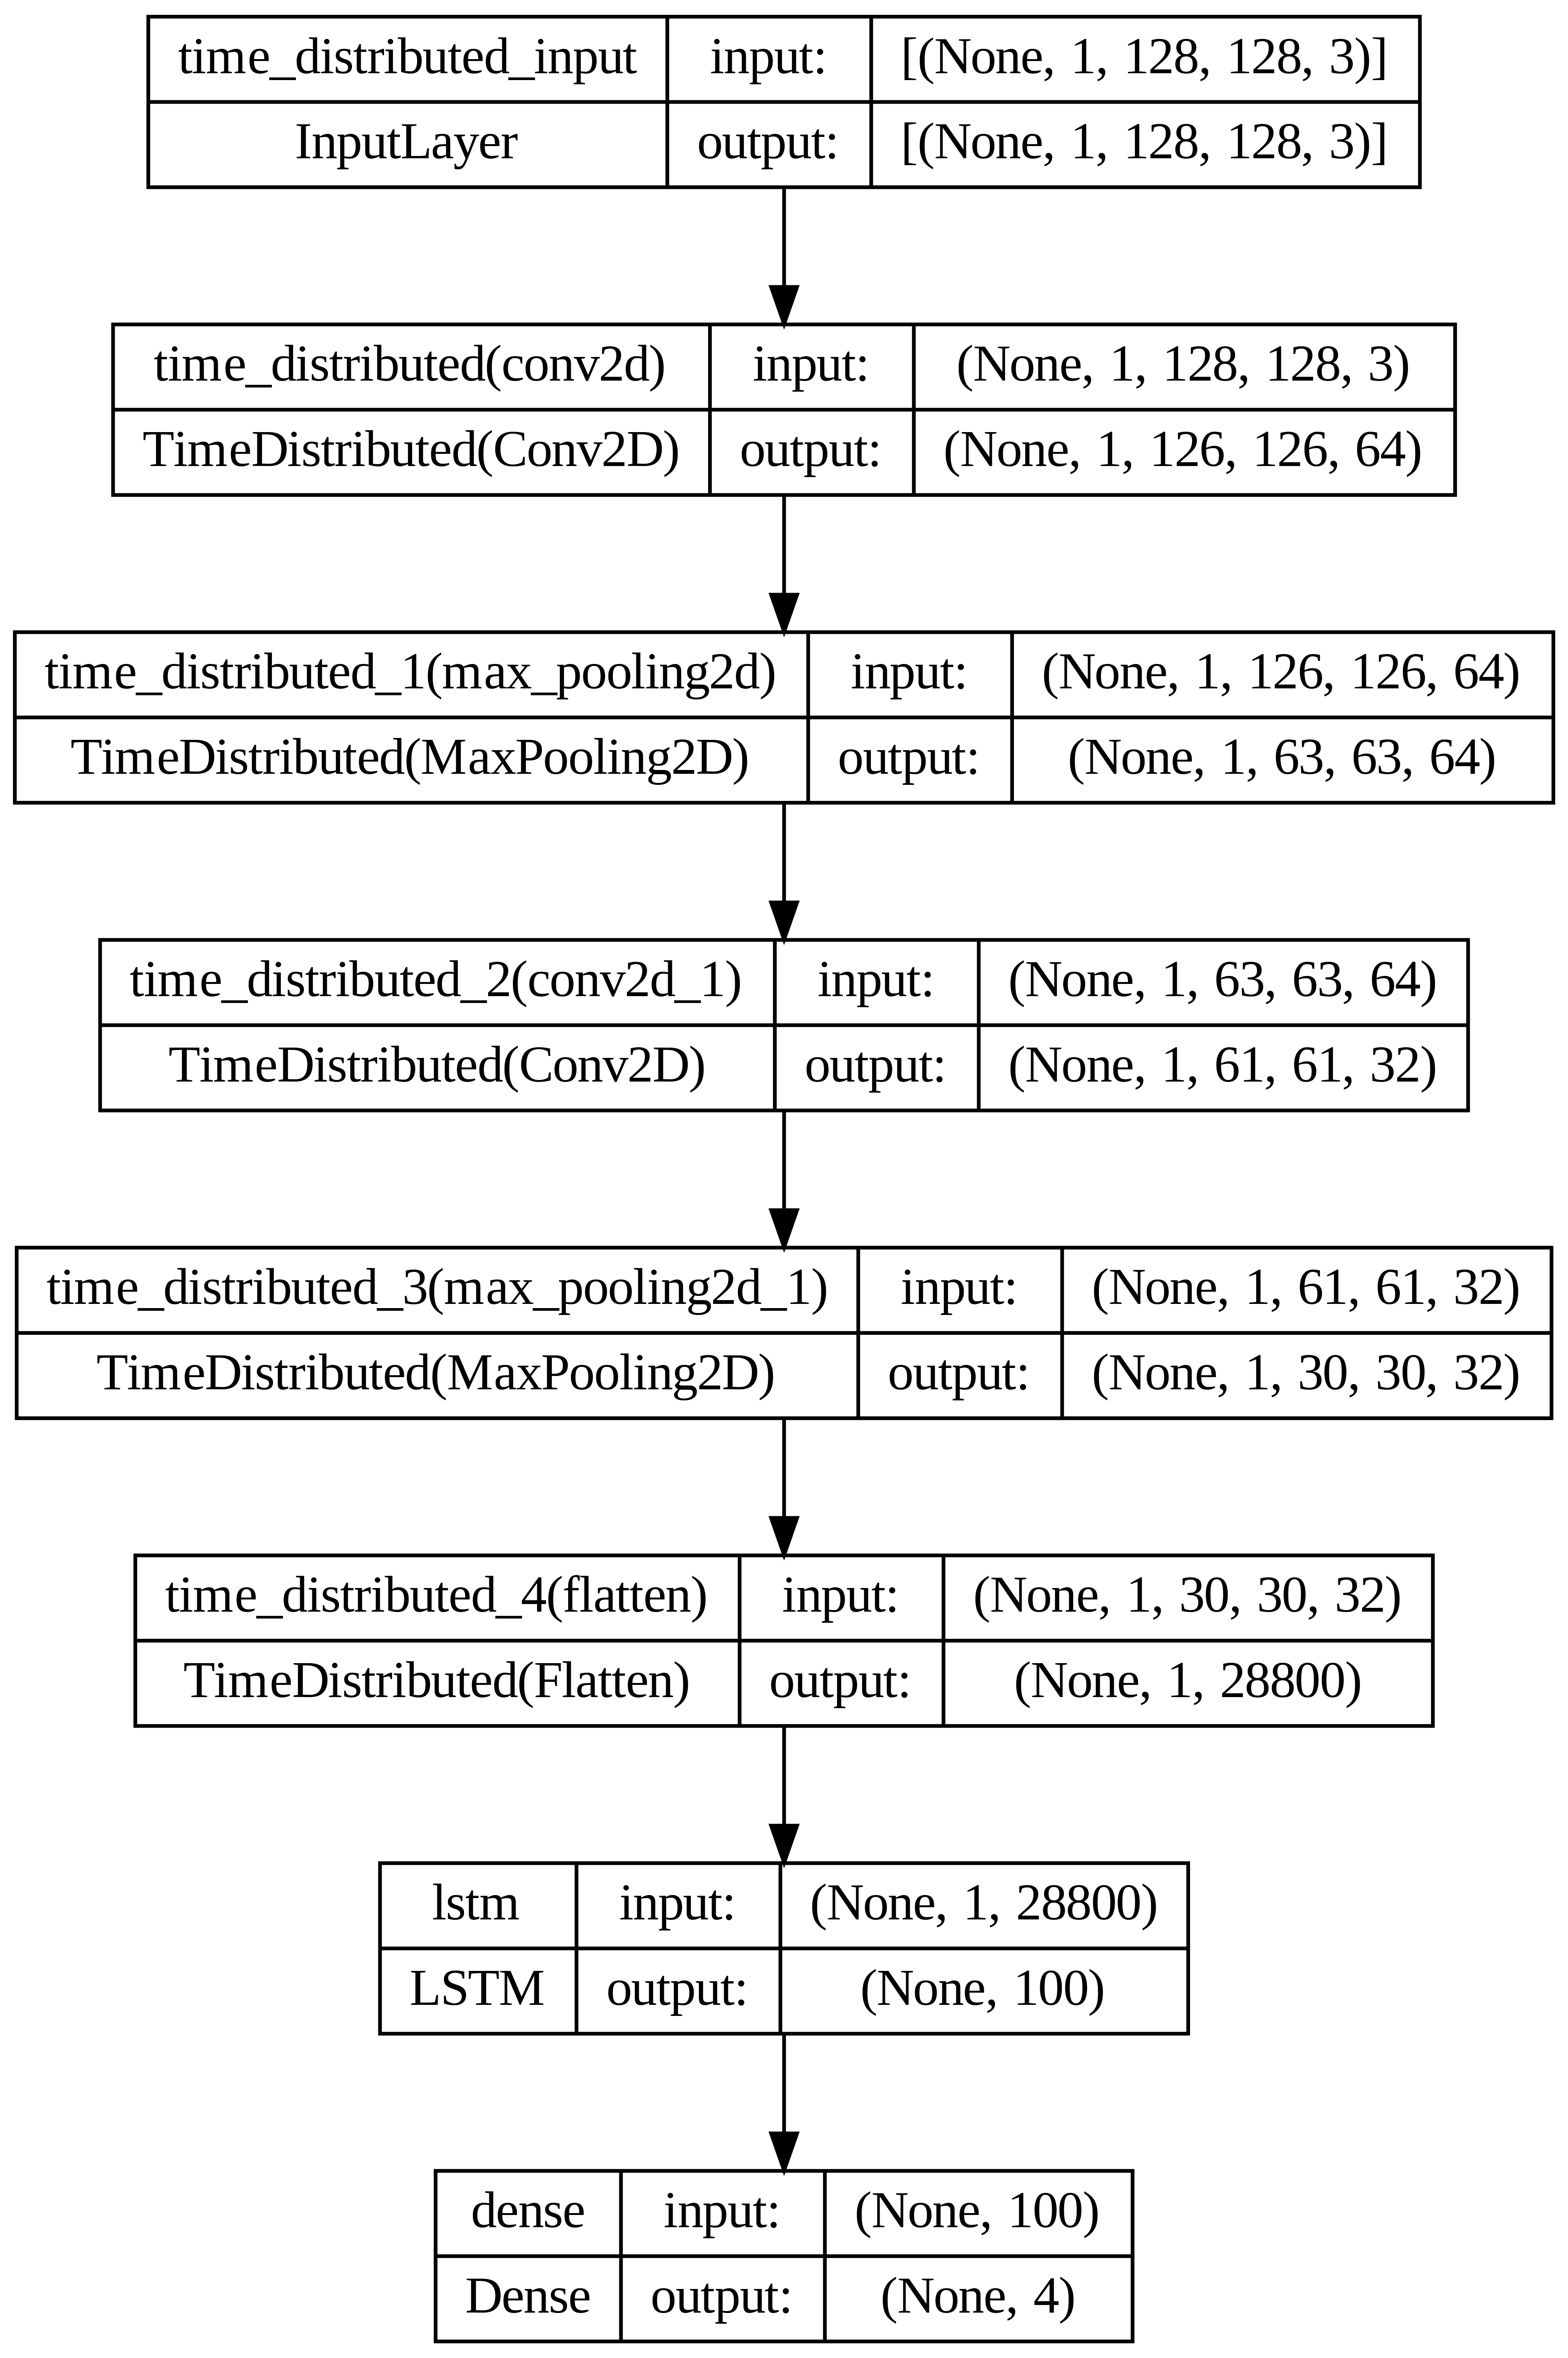

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model.png", show_shapes=True, dpi=700)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# trainig the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),shuffle=True, epochs =25,batch_size=16)

Epoch 1/25
396/396 [==============================] - 16s 24ms/step - loss: 0.3706 - accuracy: 0.6510 - val_loss: 0.2907 - val_accuracy: 0.7734
Epoch 2/25
396/396 [==============================] - 8s 20ms/step - loss: 0.2545 - accuracy: 0.8082 - val_loss: 0.2522 - val_accuracy: 0.7953
Epoch 3/25
396/396 [==============================] - 8s 20ms/step - loss: 0.1825 - accuracy: 0.8801 - val_loss: 0.1408 - val_accuracy: 0.9078
Epoch 4/25
396/396 [==============================] - 8s 20ms/step - loss: 0.1334 - accuracy: 0.9185 - val_loss: 0.1225 - val_accuracy: 0.9305
Epoch 5/25
396/396 [==============================] - 8s 20ms/step - loss: 0.1026 - accuracy: 0.9378 - val_loss: 0.0810 - val_accuracy: 0.9555
Epoch 6/25
396/396 [==============================] - 9s 24ms/step - loss: 0.0814 - accuracy: 0.9526 - val_loss: 0.0838 - val_accuracy: 0.9703
Epoch 7/25
396/396 [==============================] - 8s 20ms/step - loss: 0.0668 - accuracy: 0.9607 - val_loss: 0.0671 - val_accuracy: 0.981

In [ ]:
model.evaluate(X_test,y_test)

40/40 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9992


[0.001602741191163659, 0.999218761920929]

40/40 [==============================] - 1s 12ms/step


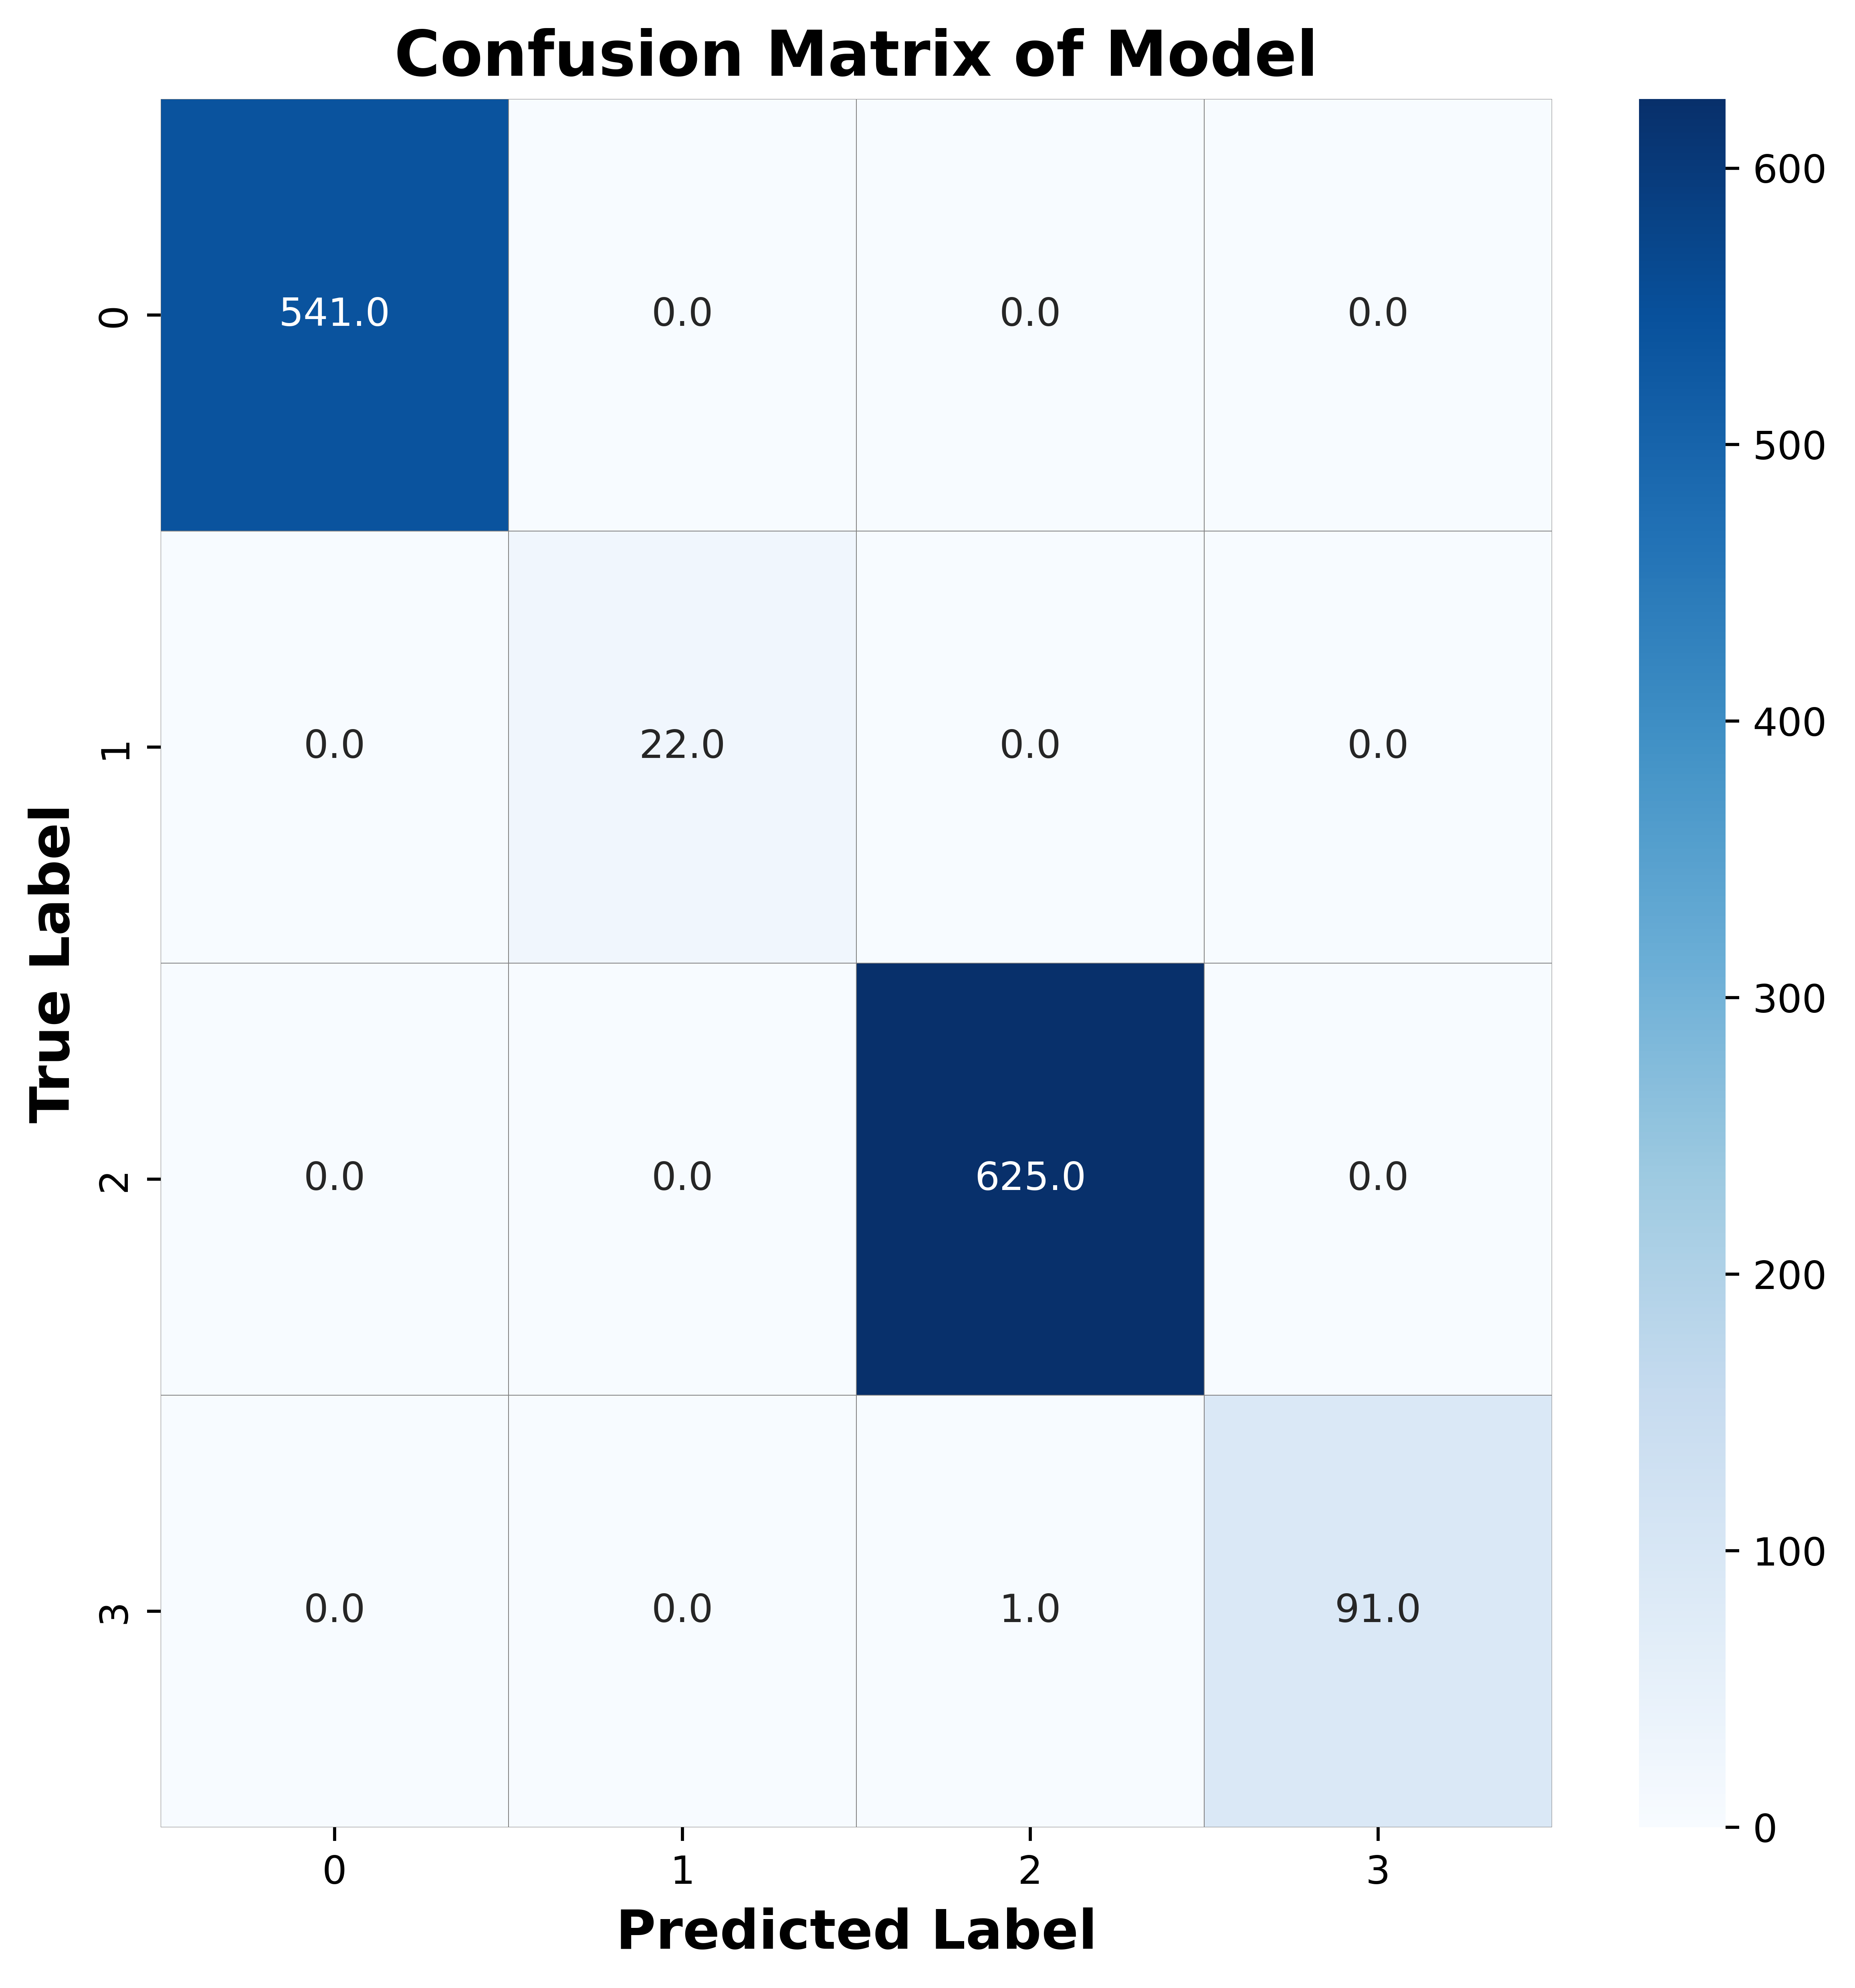

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8),dpi=700)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label",fontsize= 14, weight='bold')
plt.ylabel("True Label" ,fontsize= 14, weight='bold')
plt.title("Confusion Matrix of Model",fontsize= 16, weight='bold')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score, f1_score


# Generate predictions for the validation dataset
y_pred = model.predict(X_test)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_test, axis=1) # assuming y_test is in a multi-class format

# Class names
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Get the classification report
class_report = classification_report(y_true, y_pred_classes, target_names = class_names)
print("Accuracy score is : " ,round(accuracy_score(y_true,y_pred_classes),4)*100 ),
print("Precision score is :  ",round(precision_score(y_true,y_pred_classes,average='macro'),3)*100),
print("Recall Score is  : ",round(recall_score(y_true,y_pred_classes,average='macro'),4)*100),
print("Specifity Score is  : ",round(confusion_mtx[1,1]/(confusion_mtx[1,0]+confusion_mtx[1,1]),3)*100)
print("F1_score is  : ",round(f1_score(y_true,y_pred_classes,average='macro'),4)*100),

# Print the classification report
print(class_report)

40/40 [==============================] - 0s 9ms/step
Accuracy score is :  99.92
Precision score is :   100.0
Recall Score is  :  99.72999999999999
Specifity Score is  :  100.0
F1_score is  :  99.83999999999999
                  precision    recall  f1-score   support

    MildDemented       1.00      1.00      1.00       541
ModerateDemented       1.00      1.00      1.00        22
     NonDemented       1.00      1.00      1.00       625
VeryMildDemented       1.00      0.99      0.99        92

        accuracy                           1.00      1280
       macro avg       1.00      1.00      1.00      1280
    weighted avg       1.00      1.00      1.00      1280



In [ ]:
from imblearn.metrics import specificity_score,sensitivity_score
print(round(specificity_score(y_true, y_pred_classes,average="macro"),2)*100)
print(round(sensitivity_score(y_true, y_pred_classes,average="macro"),2)*100)

100.0
100.0


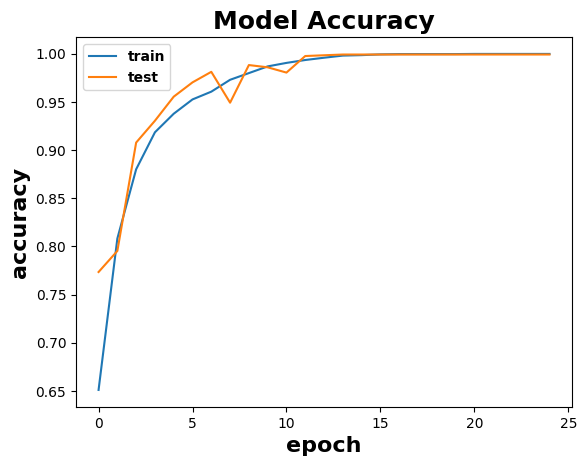

<Figure size 5600x4200 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy',fontsize= 18, weight='bold')
plt.ylabel('accuracy',fontsize= 16, weight='bold')
plt.xlabel('epoch',fontsize= 16, weight='bold')
legend_properties = {'weight':'bold'}
plt.legend(['train', 'test'], loc='upper left',fontsize= 18,prop=legend_properties)
plt.figure(figsize=(8, 6), dpi=700)
plt.show()

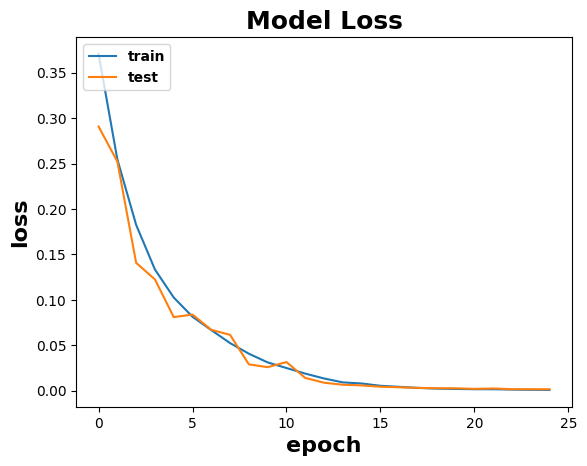

<Figure size 5600x4200 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize= 18, weight='bold')
plt.ylabel('loss',fontsize= 16, weight='bold')
plt.xlabel('epoch',fontsize= 16, weight='bold')
legend_properties = {'weight':'bold'}
plt.legend(['train', 'test'], loc='upper left',fontsize= 18,prop=legend_properties)
plt.figure(figsize=(8, 6), dpi=700)
plt.show()

In [ ]:
# Make preditions
prediction = model.predict(X_test)
prediction

40/40 [==============================] - 0s 10ms/step


array([[9.9977225e-01, 3.8529815e-05, 7.2872608e-05, 6.6728715e-04],
       [1.1474720e-04, 3.5638710e-05, 9.9974161e-01, 3.5155690e-04],
       [6.8841931e-05, 6.0669274e-05, 9.9818677e-01, 5.0746964e-04],
       ...,
       [4.8783615e-05, 4.7607089e-05, 9.9955457e-01, 4.5994864e-04],
       [9.9986267e-01, 6.4184809e-05, 1.3860282e-04, 2.4517934e-04],
       [9.1870502e-04, 7.2990282e-04, 1.3881801e-03, 9.9740124e-01]],
      dtype=float32)